In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys
# for fitting:
# from https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

In [4]:
os.getcwd()

'/home/wave/allpix2/allpixfiles/trapping_analysis/20220414'

In [5]:
import glob
glob.glob("*txt")

['20220414_mpv_.txt',
 '20220414_mpv_1e15.txt',
 'change.txt',
 '20220414_charge_fraction_1e15.txt',
 '20220414_1e13.txt',
 '20220414_mpv_1e13.txt',
 '20220414_charge_fraction_.txt',
 '20220414_charge_fraction_1e13.txt']

In [6]:
charge_fractions = {'1e15': {}, '1e13': {}}
for fluence in charge_fractions:
    charge_fractions[fluence] = {'bias': [], 'cce': [], 'stddev': []}
for fluence in charge_fractions.keys():
    print(fluence)
    filenames = glob.glob("*charge_fraction*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as cce_vs_bias:
        for line in cce_vs_bias:
            if 'x_axis' in line or line.startswith('#') or line.strip() == '': continue
            bias, cce, std = line.split()
            print(line)
            if 'None' in cce: continue
            charge_fractions[fluence]['bias'].append(float(bias))
            charge_fractions[fluence]['cce'].append(float(cce))
            charge_fractions[fluence]['stddev'].append(float(std))   

1e15
['20220414_charge_fraction_1e15.txt']
50 0.19648914 0.050624076

100 0.34548165 0.094126983

150 0.50247858 0.18022071

200 0.57103509 0.17662739

250 0.60792665 0.1718519

300 0.61947994 0.18580941

350 0.63414829 0.19093355

400 0.63893541 0.20117624

450 0.64101107 0.2119727

500 0.65023401 0.20876703

550 0.66600991 0.19635509

600 0.66178144 0.21039267

650 0.63939064 0.24185084

700 0.66485333 0.21540274

750 0.66891729 0.21577511

800 0.67270771 0.21088193

850 0.67274818 0.21382098

900 0.68242762 0.20739049

1e13
['20220414_charge_fraction_1e13.txt']
50 0.28851609 0.066256575

100 0.54288045 0.15639687

150 0.7395512 0.22107218

200 0.75305552 0.25153439

250 0.8026997 0.20146035

300 0.80776512 0.2122684

350 0.81515652 0.21243222

400 0.82740687 0.20277883

450 0.82088043 0.21991658

500 0.84256526 0.18646075

550 0.83604371 0.20419547

600 0.83460673 0.20989069

650 0.83063365 0.22125649

700 0.85505539 0.17560385

750 0.83841775 0.2090468

800 0.85276558 0.18620455

8

1
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.19648914, 0.34548165, 0.50247858, 0.57103509, 0.60792665, 0.61947994, 0.63414829, 0.63893541, 0.64101107, 0.65023401, 0.66600991, 0.66178144, 0.63939064, 0.66485333, 0.66891729, 0.67270771, 0.67274818, 0.68242762]
[0.050624076, 0.094126983, 0.18022071, 0.17662739, 0.1718519, 0.18580941, 0.19093355, 0.20117624, 0.2119727, 0.20876703, 0.19635509, 0.21039267, 0.24185084, 0.21540274, 0.21577511, 0.21088193, 0.21382098, 0.20739049]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$1$\cdot 10^{15}$/cm$^2$


AttributeError: 'PathCollection' object has no property 'fmt'

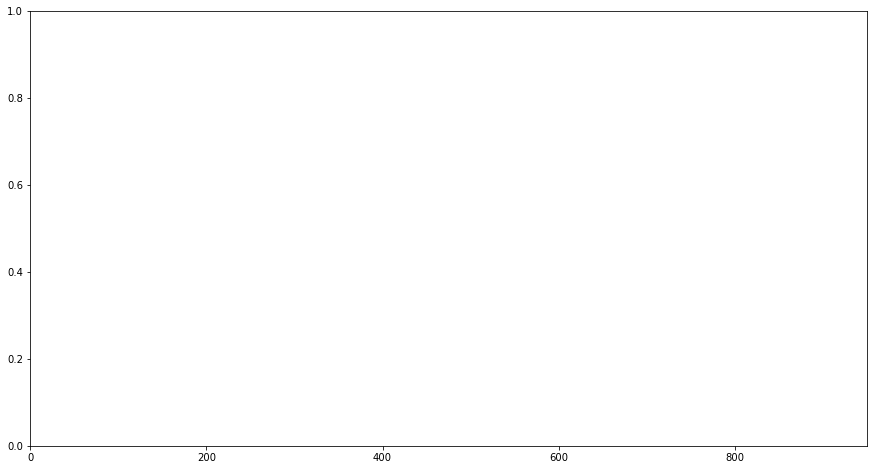

In [7]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in ['1e15']:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.scatter(x, y, label=labelname, =markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_1e15_cce_no_errorbars.png'), bbox_inches="tight")
plt.show()


1
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.19648914, 0.34548165, 0.50247858, 0.57103509, 0.60792665, 0.61947994, 0.63414829, 0.63893541, 0.64101107, 0.65023401, 0.66600991, 0.66178144, 0.63939064, 0.66485333, 0.66891729, 0.67270771, 0.67274818, 0.68242762]
[0.050624076, 0.094126983, 0.18022071, 0.17662739, 0.1718519, 0.18580941, 0.19093355, 0.20117624, 0.2119727, 0.20876703, 0.19635509, 0.21039267, 0.24185084, 0.21540274, 0.21577511, 0.21088193, 0.21382098, 0.20739049]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$1$\cdot 10^{15}$/cm$^2$
1
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.28851609, 0.54288045, 0.7395512, 0.75305552, 0.8026997, 0.80776512, 0.81515652, 0.82740687, 0.82088043, 0.84256526, 0.83604371, 0.83460673, 0.83063365, 0.85505539, 0.83841775, 0.85276558, 0.85548821, 0.85635025]
[0.066256575, 0.15639687

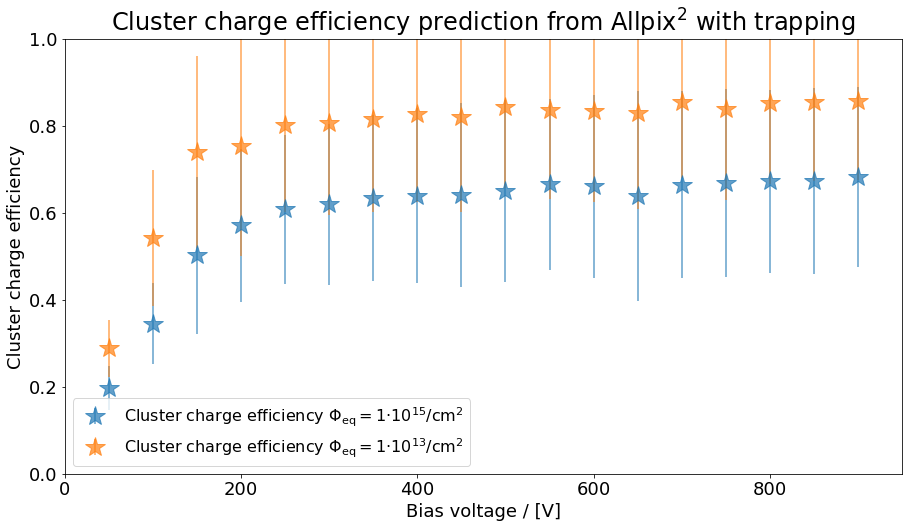

In [7]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_cce.png'), bbox_inches="tight")
plt.show()


In [8]:
#cluster_charges = {'ljubljana': {}, 'dortmund': {}, 'cmstracker': {}}
cluster_charges = {'1e13': {}, '1e15': {}}
for fluence in cluster_charges:
    cluster_charges[fluence] = {'bias': [], 'mpv': [], 'err': []}
for fluence in cluster_charges.keys():
    print(fluence)
    filenames = glob.glob("*mpv*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as mpv_vs_bias:
        for line in mpv_vs_bias:
            if 'mpv' in line or line.startswith('#') or line.strip() == '': continue
            bias, mpv, err = line.split()
            print(line)
            if 'None' in mpv: continue
            cluster_charges[fluence]['bias'].append(float(bias.split('e')[0]))
            cluster_charges[fluence]['mpv'].append(float(mpv))
            cluster_charges[fluence]['err'].append(float(err))   

1e13
['20220414_mpv_1e13.txt']
50 2.9407 0.0184288

100 5.40264 0.0289994

150 8.36408 0.0452624

200 9.1095 0.0509595

250 9.59205 0.0496124

300 9.90386 0.0552382

350 10.0794 0.0538909

400 10.3593 0.052095

450 10.3787 0.0547785

500 10.5004 0.0535268

550 10.6323 0.0538958

600 10.6396 0.0622357

650 10.8576 0.0613646

700 10.6511 0.0608973

750 10.7506 0.0575227

800 11.031 0.0615257

850 10.8933 0.0580556

900 10.8459 0.0591898

1e15
['20220414_mpv_1e15.txt']
50 3.91403 0.591653

100 9.44274 2.29586

150 15.4557 477.995

200 277901.0 4142640.0

250 13.4638 0.0525869

300 14.8606 0.294762

350 1.35148 7.45395

400 7.94546 92.0627

450 14.4689 3.59148

500 0.0437845 64.2899

550 3.4155 7.172

600 4.57761 157.034

650 16.5068 53.1612

700 6.5896 327.63

750 -7.06954 135.965

800 16.3971 0.0531546

850 53185.1 320790.0

900 14.4704 0.230847



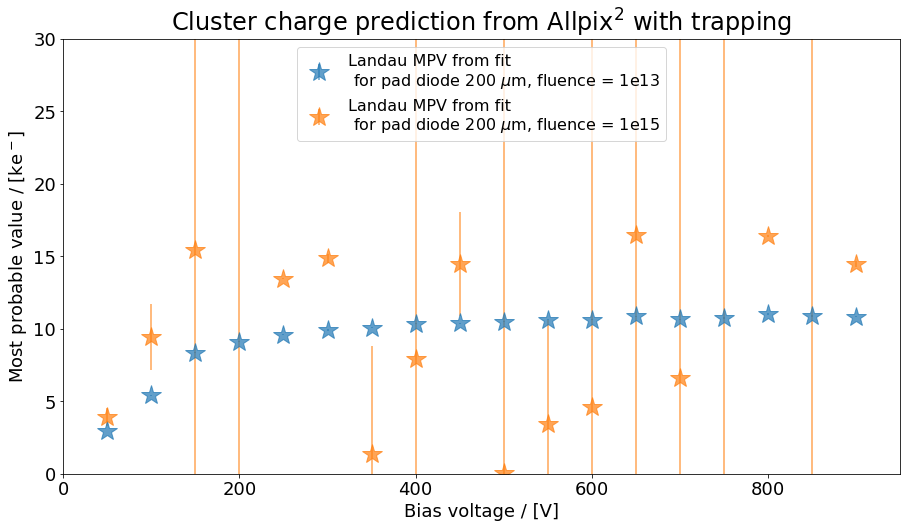

In [10]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
model = 'cmstracker'
voltage = -600
plot_file_name = ''
for fluence in cluster_charges:
    x = cluster_charges[fluence]['bias']
    y = cluster_charges[fluence]['mpv']
    yerr = cluster_charges[fluence]['err']
    plt.errorbar(x, y, yerr = yerr, label="Landau MPV from fit\n for pad diode " + str(thickness) + " $\mu$m, fluence = " + fluence, fmt=markerstyle, markersize=20, alpha=0.7)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    filenames = glob.glob("*" + model + "*dat")
    plt.title("Cluster charge prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Most probable value / [ke$^-$]", fontsize = 18)
    plot_file_name += os.path.basename(filename)[:-4] + '_'
    plt.ylim((0,30))
    plt.xlim((0,950))
plt.savefig(os.path.join(dirname, plot_file_name + 'cluster_charge.png'), bbox_inches="tight")
plt.show()